In [33]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
%matplotlib inline

In [34]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [35]:
raft_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\raft_outdoor\\raft_7-nodes\\data.csv", sep=",")

In [36]:
raft_data_7_nodes[raft_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,19,364,57,19.0
4,2,1,18,241,56,19.0
...,...,...,...,...,...,...
6867,4,996,22,1394,33,26.0
6868,5,1000,23,652,37,25.0
6869,6,1000,20,65535,33,26.0
6870,7,999,23,955,33,25.0


In [37]:
paxos_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\paxos_outdoor\\paxos_7-nodes\\data.csv", sep=",")

In [38]:
noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control_outdoor\\outdoor_control_7-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 198: expected 6 fields, saw 7\n'


In [39]:
raft_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872 entries, 0 to 6871
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      6872 non-null   object 
 1   packetNumber  6867 non-null   object 
 2   temperature   6867 non-null   object 
 3   brightness    6867 non-null   object 
 4   humidity      6865 non-null   object 
 5   onBoardTemp   6854 non-null   float64
dtypes: float64(1), object(5)
memory usage: 322.2+ KB


In [40]:
raft_data_7_nodes.shape

(6872, 6)

In [41]:
paxos_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6689 entries, 0 to 6688
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      6689 non-null   object
 1   packetNumber  6682 non-null   object
 2   temperature   6682 non-null   object
 3   brightness    6682 non-null   object
 4   humidity      6682 non-null   object
 5   onBoardTemp   6678 non-null   object
dtypes: object(6)
memory usage: 313.7+ KB


In [42]:
paxos_data_7_nodes.shape

(6689, 6)

In [43]:
noalg_data_7_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodeName      3541 non-null   object
 1   packetNumber  3498 non-null   object
 2   temperature   3450 non-null   object
 3   brightness    3408 non-null   object
 4   humidity      3354 non-null   object
 5   onBoardTemp   3289 non-null   object
dtypes: object(6)
memory usage: 166.1+ KB


In [44]:
noalg_data_7_nodes.shape

(3541, 6)

In [45]:
#RAFT

In [46]:
raft_data_7_nodes[raft_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,19,364,57,19.0
4,2,1,18,241,56,19.0
...,...,...,...,...,...,...
6867,4,996,22,1394,33,26.0
6868,5,1000,23,652,37,25.0
6869,6,1000,20,65535,33,26.0
6870,7,999,23,955,33,25.0


In [47]:
raft_data_7_nodes_clean = raft_data_7_nodes.dropna()

In [48]:
raft_data_7_nodes_clean.shape

(6854, 6)

In [49]:
raft_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_7_nodes_clean.csv', index = False, header=True)

In [62]:
#manual cleaning of the csv req

In [64]:
clean_raft_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\raft_data_7_nodes_clean.csv", sep=",")

In [65]:
clean_raft_data_7 = clean_raft_data_7_nodes.dropna()

In [67]:
final_clean_raft_7 = clean_raft_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [68]:
final_clean_raft_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6848 entries, 0 to 6853
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nodeName      6848 non-null   int64
 1   packetNumber  6848 non-null   int64
 2   temperature   6848 non-null   int64
 3   brightness    6848 non-null   int64
 4   humidity      6848 non-null   int64
 5   onBoardTemp   6848 non-null   int64
dtypes: int64(6)
memory usage: 374.5 KB


In [51]:
#PAXOS

In [52]:
paxos_data_7_nodes[paxos_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,24,152,45,24
4,6,1,22,747,43,24
...,...,...,...,...,...,...
6684,3,999,21,0,48,22
6685,5,989,22,0,42,23
6686,6,998,20,3,42,23
6687,2,1000,22,0,40,23


In [53]:
paxos_data_7_nodes_clean = paxos_data_7_nodes.dropna()

In [54]:
paxos_data_7_nodes_clean.shape

(6678, 6)

In [55]:
paxos_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_7_nodes_clean.csv', index = False, header=True)

In [69]:
#manual cleaning of the csv req

In [70]:
clean_paxos_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\paxos_data_7_nodes_clean.csv", sep=",")

In [71]:
clean_paxos_data_7_nodes.shape

(6678, 6)

In [72]:
clean_paxos_data_7 = clean_paxos_data_7_nodes.dropna()

In [73]:
clean_paxos_data_7.shape

(6671, 6)

In [74]:
final_clean_paxos_7 = clean_paxos_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [57]:
#NO ALG

In [58]:
noalg_data_7_nodes[noalg_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3536,7,996,16,72,58,17
3537,7,997,16,66,58,17
3538,7,998,16,66,59,17
3539,7,999,16,66,59,17


In [59]:
noalg_data_7_nodes_clean = noalg_data_7_nodes.dropna()

In [60]:
noalg_data_7_nodes_clean.shape

(3289, 6)

In [61]:
noalg_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_7_nodes_clean.csv', index = False, header=True)

In [75]:
#manual cleaning of the csv req

In [76]:
clean_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\noalg_data_7_nodes_clean.csv", sep=",")

In [77]:
clean_noalg_data_7_nodes.shape

(3289, 6)

In [78]:
clean_noalg_data_7 = clean_noalg_data_7_nodes.dropna()

In [79]:
clean_noalg_data_7.shape

(3258, 6)

In [80]:
final_clean_noalg_7 = clean_noalg_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [132]:
df = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithm'], 
               'goodPacketsReceived': [len(final_clean_raft_7), len(final_clean_paxos_7), len(final_clean_noalg_7)], 
               'totalPacketsReceived': [len(raft_data_7_nodes), len(paxos_data_7_nodes), len(noalg_data_7_nodes)], 
               'packetsExpected': [7000, 7000, 7000]}

all_7_nodes = pd.DataFrame(df)

In [133]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['font.family'] = "serif"

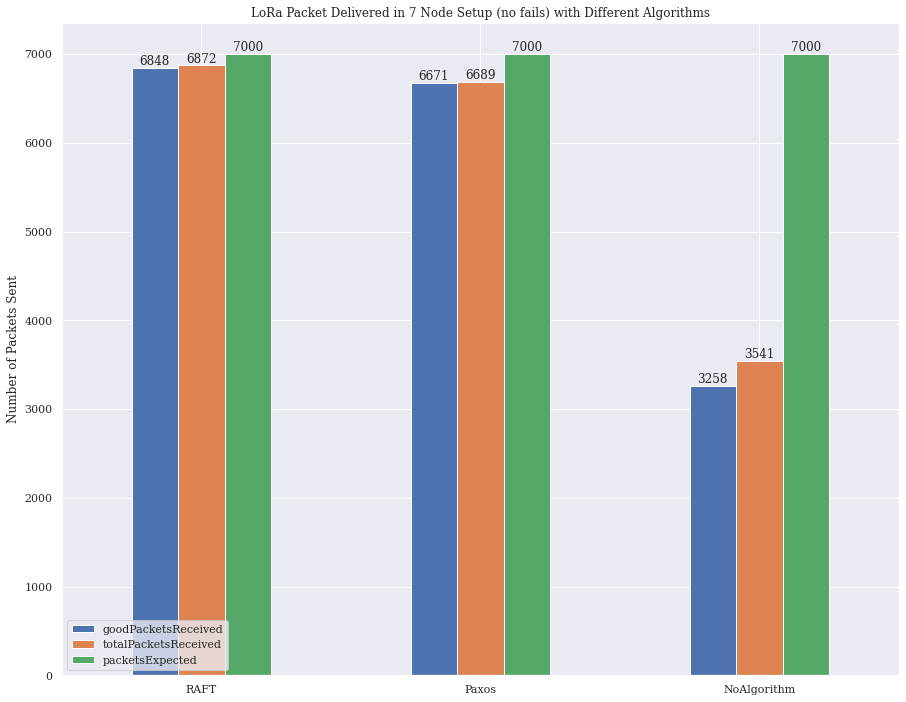

In [142]:
ax = all_7_nodes.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 7 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes.png', bbox_inches='tight')

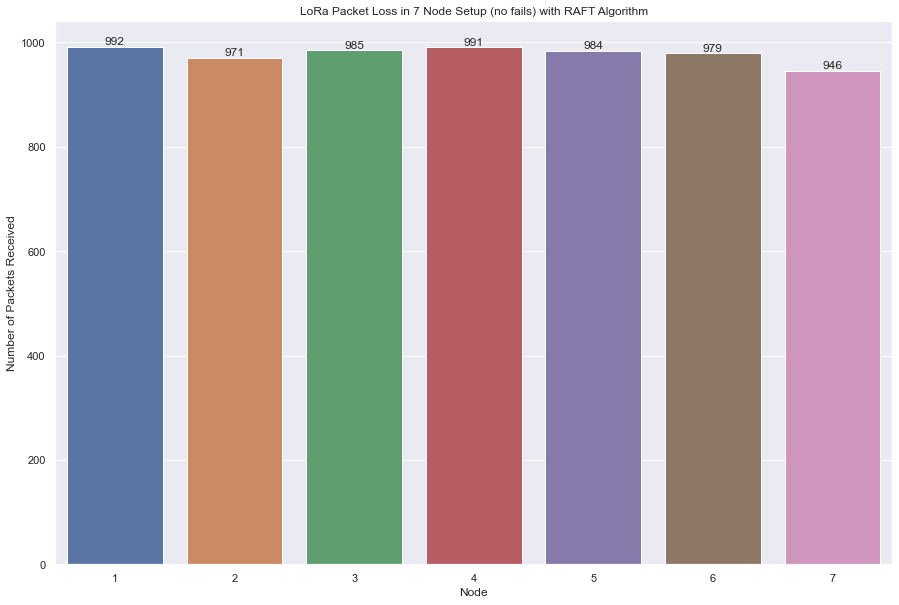

In [143]:
#LoRa Packet Loss in 7 Node Setup (no fails) with RAFT Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_raft_7)
plt.title('LoRa Packet Loss in 7 Node Setup (no fails) with RAFT Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_RAFT.png', bbox_inches='tight')

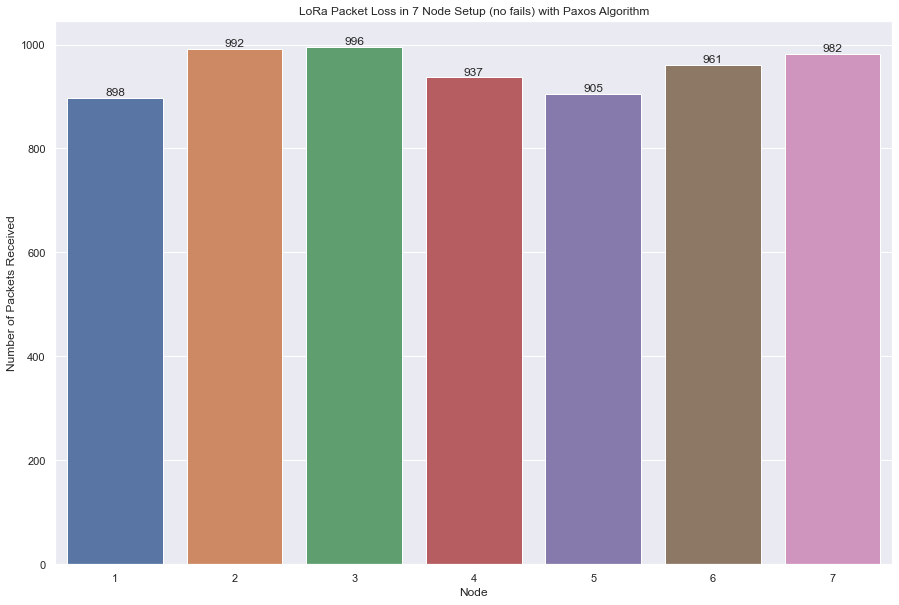

In [144]:
#LoRa Packet Loss in 7 Node Setup (no fails) with Paxos Algorithm
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_paxos_7)
plt.title('LoRa Packet Loss in 7 Node Setup (no fails) with Paxos Algorithm')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_Paxos.png', bbox_inches='tight')

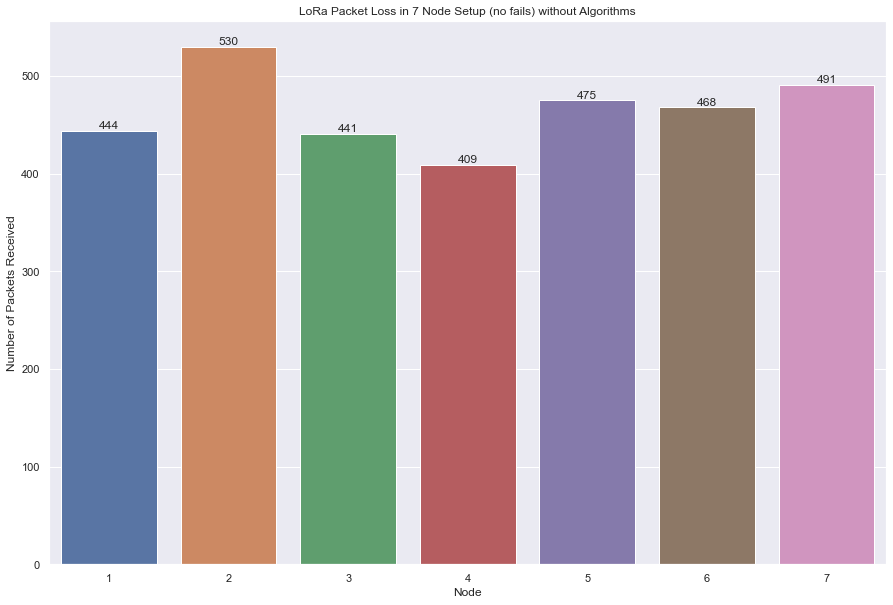

In [145]:
#LoRa Packet Loss in 7 Node Setup (no fails) without Algorithms
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_clean_noalg_7)
plt.title('LoRa Packet Loss in 7 Node Setup (no fails) without Algorithms')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_noAlg_outdoor.png', bbox_inches='tight')

In [106]:
#no alg indoor

In [122]:
indoor_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\packet_loss\\control\\3_control_7-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 157: expected 6 fields, saw 7\nSkipping line 240: expected 6 fields, saw 7\nSkipping line 242: expected 6 fields, saw 7\nSkipping line 430: expected 6 fields, saw 7\nSkipping line 798: expected 6 fields, saw 7\nSkipping line 1007: expected 6 fields, saw 7\nSkipping line 1581: expected 6 fields, saw 7\nSkipping line 1822: expected 6 fields, saw 7\nSkipping line 2603: expected 6 fields, saw 7\n'


In [108]:
indoor_noalg_data_7_nodes[indoor_noalg_data_7_nodes.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,21,12,56,19
3,4,2,21,12,56,19
4,4,3,21,12,56,19
...,...,...,...,...,...,...
2643,3,996,20,10,45,21
2644,3,997,20,10,45,21
2645,3,998,20,11,45,21
2646,3,999,20,10,45,21


In [109]:
indoor_noalg_data_7_nodes_clean = indoor_noalg_data_7_nodes.dropna()

In [110]:
indoor_noalg_data_7_nodes_clean.shape

(2403, 6)

In [111]:
indoor_noalg_data_7_nodes_clean.to_csv('C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_7_nodes_clean.csv', index = False, header=True)

In [112]:
#manual cleaning of the csv req

In [123]:
clean_indoor_noalg_data_7_nodes = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\indoor_noalg_data_7_nodes_clean.csv", sep=",")

In [124]:
clean_indoor_noalg_data_7_nodes.shape

(2403, 6)

In [125]:
clean_indoor_noalg_data_7 = clean_indoor_noalg_data_7_nodes.dropna()

In [126]:
clean_indoor_noalg_data_7.shape

(2366, 6)

In [127]:
final_indoor_clean_noalg_7 = clean_indoor_noalg_data_7.astype({"nodeName":np.int64,"packetNumber":np.int64,"temperature":np.int64,"brightness":np.int64,"humidity":np.int64,"onBoardTemp":np.int64})

In [135]:
df1 = {'algorithm': ['RAFT', 'Paxos', 'NoAlgorithmOutdoor', 'NoAlgorithmIndoor'], 
               'goodPacketsReceived': [len(final_clean_raft_7), len(final_clean_paxos_7), len(final_clean_noalg_7),len(final_indoor_clean_noalg_7)], 
               'totalPacketsReceived': [len(raft_data_7_nodes), len(paxos_data_7_nodes), len(noalg_data_7_nodes),len(indoor_noalg_data_7_nodes)], 
               'packetsExpected': [7000, 7000, 7000,7000]}

all_7_nodes_indoor = pd.DataFrame(df1)

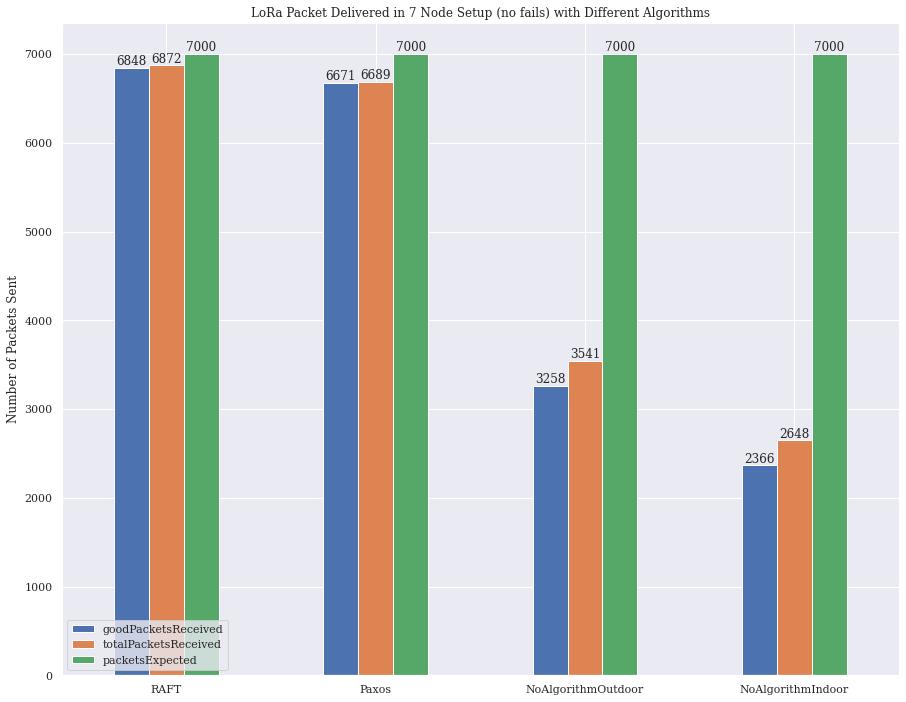

In [141]:
ax = all_7_nodes_indoor.plot.bar(x='algorithm')
plt.title('LoRa Packet Delivered in 7 Node Setup (no fails) with Different Algorithms')
ax.set(xlabel='', ylabel='Number of Packets Sent')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc='lower left')
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_indoor.png', bbox_inches='tight')

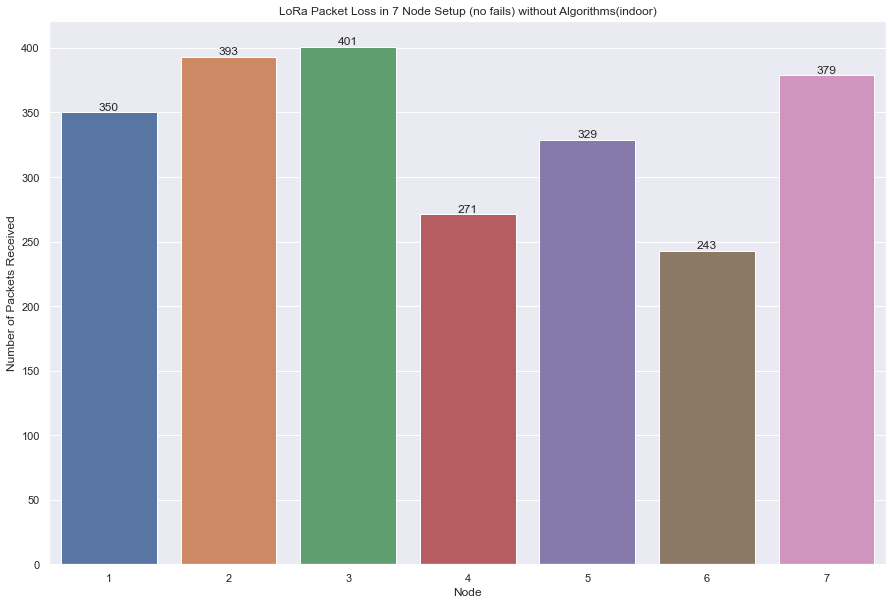

In [146]:
#LoRa Packet Loss in 7 Node Setup (no fails) without Algorithms INDOOR
plt.rcParams['figure.figsize']=(15,10)
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='nodeName', data=final_indoor_clean_noalg_7)
plt.title('LoRa Packet Loss in 7 Node Setup (no fails) without Algorithms(indoor)')
ax.set(xlabel='Node', ylabel='Number of Packets Received')
#for container in ax.containers:
    #ax.bar_label(container)
ax.bar_label(ax.containers[0])
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\7_nodes_noAlg_indoor.png', bbox_inches='tight')